In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_data(filepath):
    """Tải dữ liệu từ file csv."""
    return pd.read_csv(filepath)

# Tải dữ liệu
df = load_data('titanic_disaster.csv')

# Hiển thị 10 dòng đầu tiên
print(df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54


Missing Data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


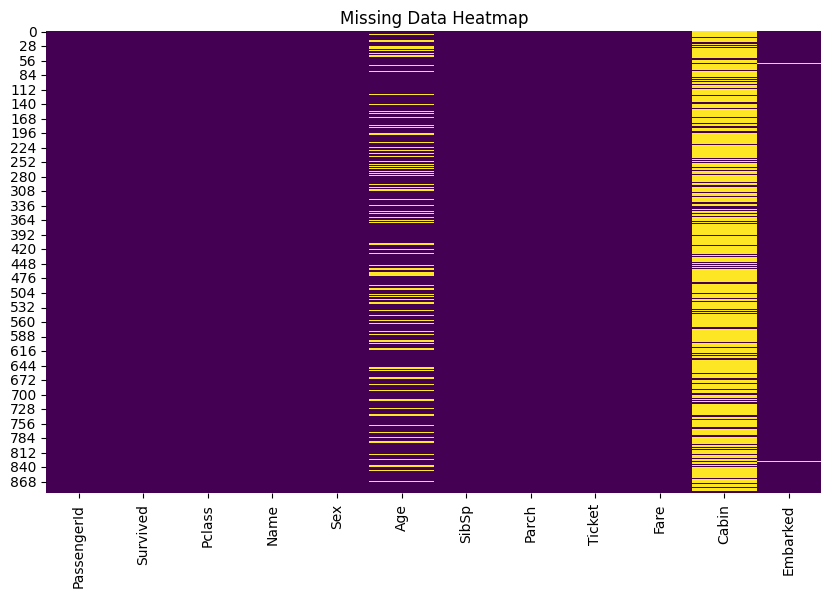


Nhận xét:
- Age: Thiếu nhiều dữ liệu.
- Cabin: Thiếu rất nhiều dữ liệu, có thể không hữu ích.
- Embarked: Thiếu ít dữ liệu.


In [2]:
# Thống kê dữ liệu thiếu
missing_data = df.isnull().sum()
print("\nMissing Data:\n", missing_data)

# Trực quan hóa dữ liệu thiếu
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Nhận xét
print("\nNhận xét:")
print("- Age: Thiếu nhiều dữ liệu.")
print("- Cabin: Thiếu rất nhiều dữ liệu, có thể không hữu ích.")
print("- Embarked: Thiếu ít dữ liệu.")

In [3]:
# Tách firstName và secondName
df[['firstName', 'secondName']] = df['Name'].str.split(',', expand=True)

# Xóa cột Name
df.drop('Name', axis=1, inplace=True)

print(df[['firstName', 'secondName']].head())

   firstName                                   secondName
0     Braund                              Mr. Owen Harris
1    Cumings   Mrs. John Bradley (Florence Briggs Thayer)
2  Heikkinen                                  Miss. Laina
3   Futrelle           Mrs. Jacques Heath (Lily May Peel)
4      Allen                            Mr. William Henry


In [4]:
# Thay thế male -> M và female -> F
df['Sex'].replace({'male': 'M', 'female': 'F'}, inplace=True)

print(df['Sex'].head())

0    M
1    F
2    F
3    F
4    M
Name: Sex, dtype: object


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8844\456721359.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'male': 'M', 'female': 'F'}, inplace=True)


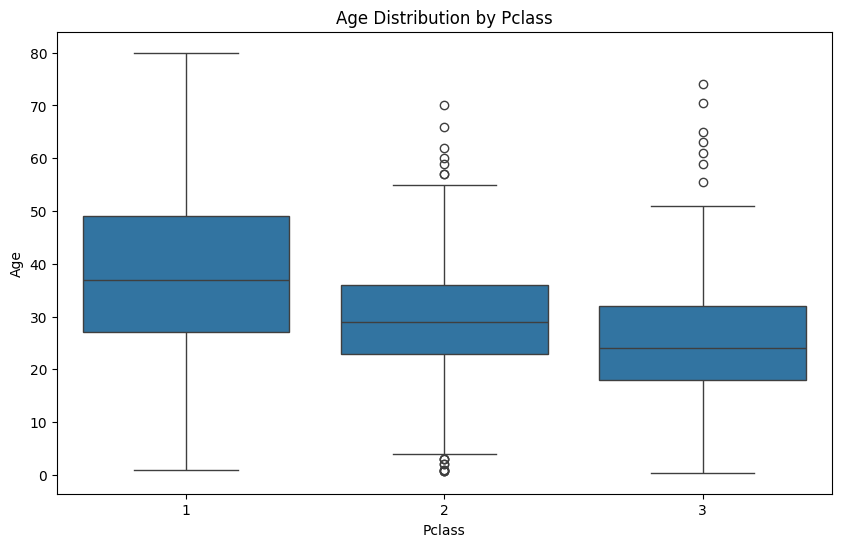


Nhận xét:
Tuổi trung bình khác nhau giữa các nhóm Pclass, nên thay thế theo từng nhóm.

Missing Data (Age):
 0


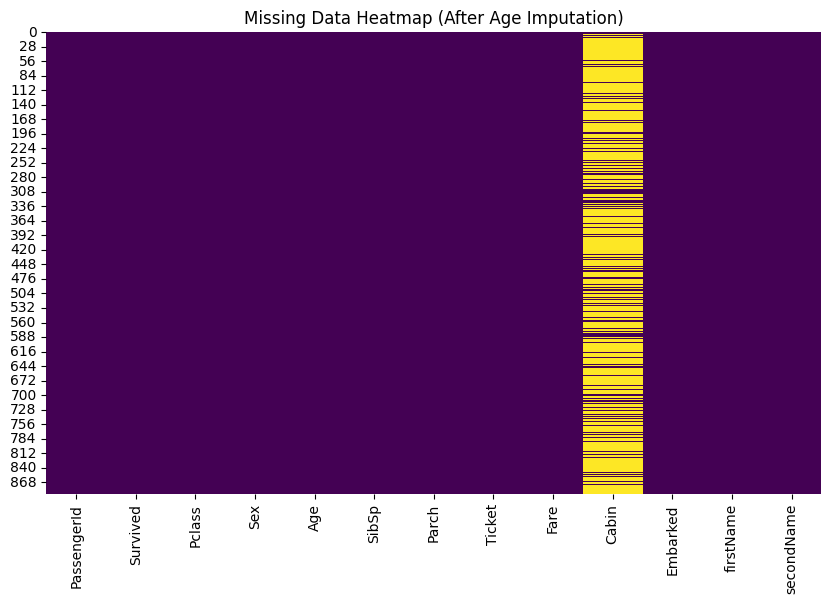

In [5]:
# a. Vẽ boxplot để xác định phân phối tuổi theo Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass')
plt.show()

print("\nNhận xét:")
print("Tuổi trung bình khác nhau giữa các nhóm Pclass, nên thay thế theo từng nhóm.")

# b. Thay thế giá trị thiếu theo Pclass
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

# Kiểm tra lại dữ liệu thiếu
print("\nMissing Data (Age):\n", df['Age'].isnull().sum())

# Trực quan hóa lại dữ liệu thiếu
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap (After Age Imputation)')
plt.show()

In [6]:
# Xây dựng biến Agegroup
bins = [0, 12, 18, 60, np.inf]
labels = ['Kid', 'Teen', 'Adult', 'Older']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

print(df['AgeGroup'].head())

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: AgeGroup, dtype: category
Categories (4, object): ['Kid' < 'Teen' < 'Adult' < 'Older']


In [7]:
# Thêm đặc trưng namePrefix
df['namePrefix'] = df['secondName'].str.extract(' ([A-Za-z]+)\.', expand=False)

print(df['namePrefix'].head())

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: namePrefix, dtype: object


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8844\3586106352.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['namePrefix'] = df['secondName'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [8]:
# Thêm đặc trưng familySize
df['familySize'] = 1 + df['SibSp'] + df['Parch']

print(df['familySize'].head())

0    2
1    2
2    1
3    2
4    1
Name: familySize, dtype: int64


In [9]:
# Tạo đặc trưng Alone
df['Alone'] = np.where(df['familySize'] == 1, 1, 0)

print(df['Alone'].head())

0    0
1    0
2    1
3    0
4    1
Name: Alone, dtype: int32


In [10]:
# Tách loại cabin
df['typeCabin'] = df['Cabin'].str[0].fillna('Unknown')

print(df['typeCabin'].head())

0    Unknown
1          C
2    Unknown
3          C
4    Unknown
Name: typeCabin, dtype: object


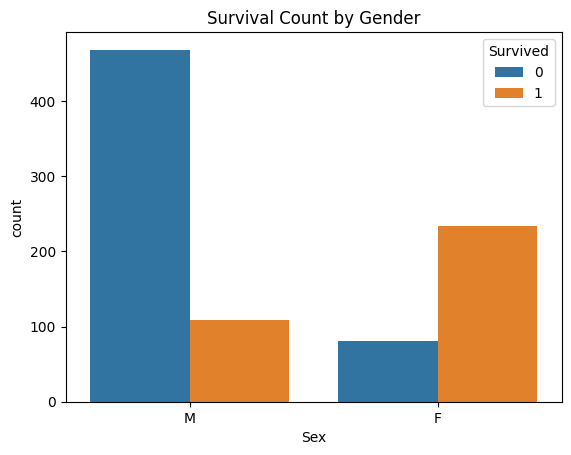


Nhận xét: Nữ giới có tỉ lệ sống sót cao hơn nam giới.


In [11]:
# Trực quan tỉ lệ sống sót theo giới tính
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()

print("\nNhận xét: Nữ giới có tỉ lệ sống sót cao hơn nam giới.")

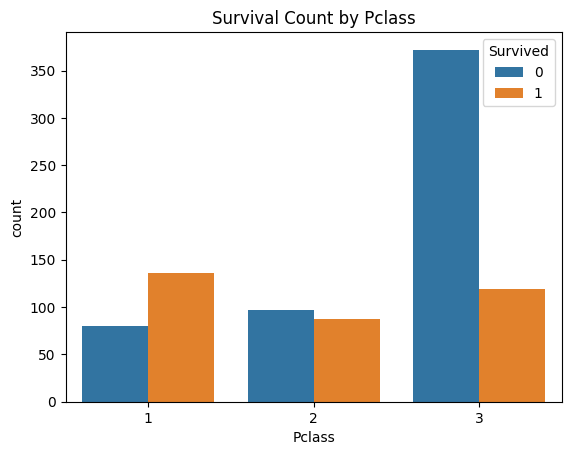


Nhận xét: Hành khách hạng 1 có tỉ lệ sống sót cao nhất.


In [12]:
# Trực quan tỉ lệ sống sót theo Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Pclass')
plt.show()

print("\nNhận xét: Hành khách hạng 1 có tỉ lệ sống sót cao nhất.")

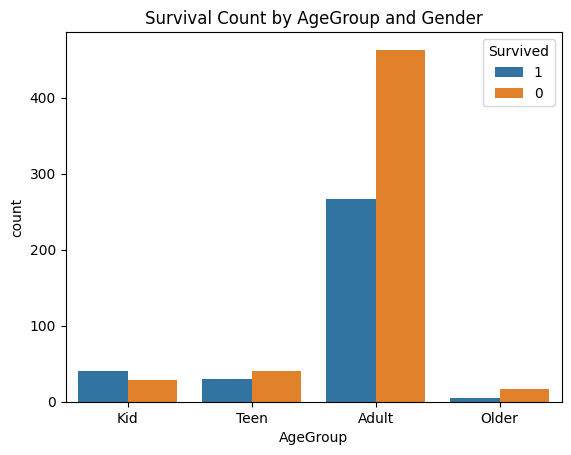


Nhận xét: Trẻ em và phụ nữ có tỉ lệ sống sót cao hơn.


In [13]:
# Trực quan tỉ lệ sống sót theo giới tính và AgeGroup
sns.countplot(x='AgeGroup', hue='Survived', data=df, hue_order=[1, 0])
plt.title('Survival Count by AgeGroup and Gender')
plt.show()

print("\nNhận xét: Trẻ em và phụ nữ có tỉ lệ sống sót cao hơn.")

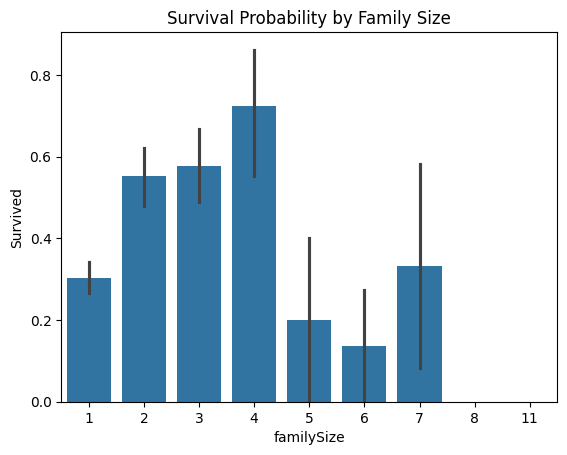


Nhận xét: Người đi theo nhóm nhỏ có tỉ lệ sống sót cao hơn.


In [14]:
# Trực quan xác suất sống sót theo familySize
sns.barplot(x='familySize', y='Survived', data=df)
plt.title('Survival Probability by Family Size')
plt.show()

print("\nNhận xét: Người đi theo nhóm nhỏ có tỉ lệ sống sót cao hơn.")

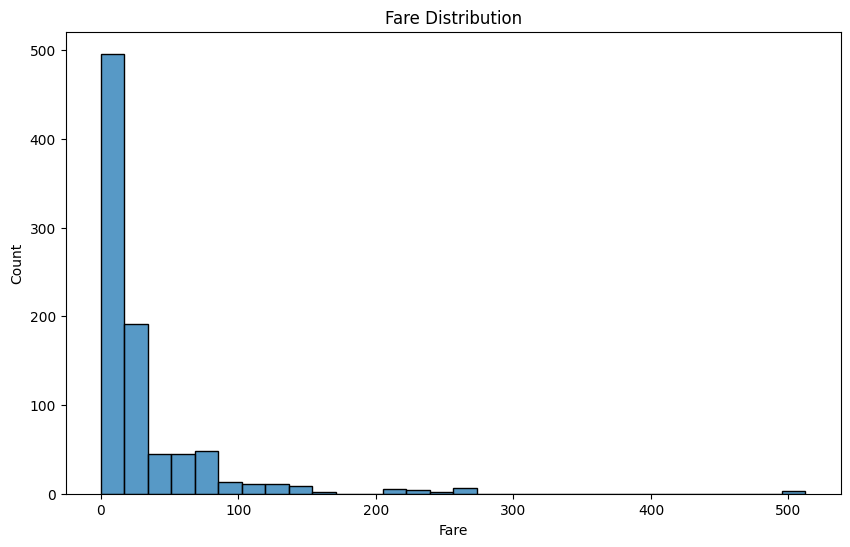


Nhận xét: Hành khách có giá vé cao hơn có tỉ lệ sống sót cao hơn.


In [15]:
# Trực quan xác suất sống sót theo Fare
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=False)
plt.title('Fare Distribution')
plt.show()

print("\nNhận xét: Hành khách có giá vé cao hơn có tỉ lệ sống sót cao hơn.")

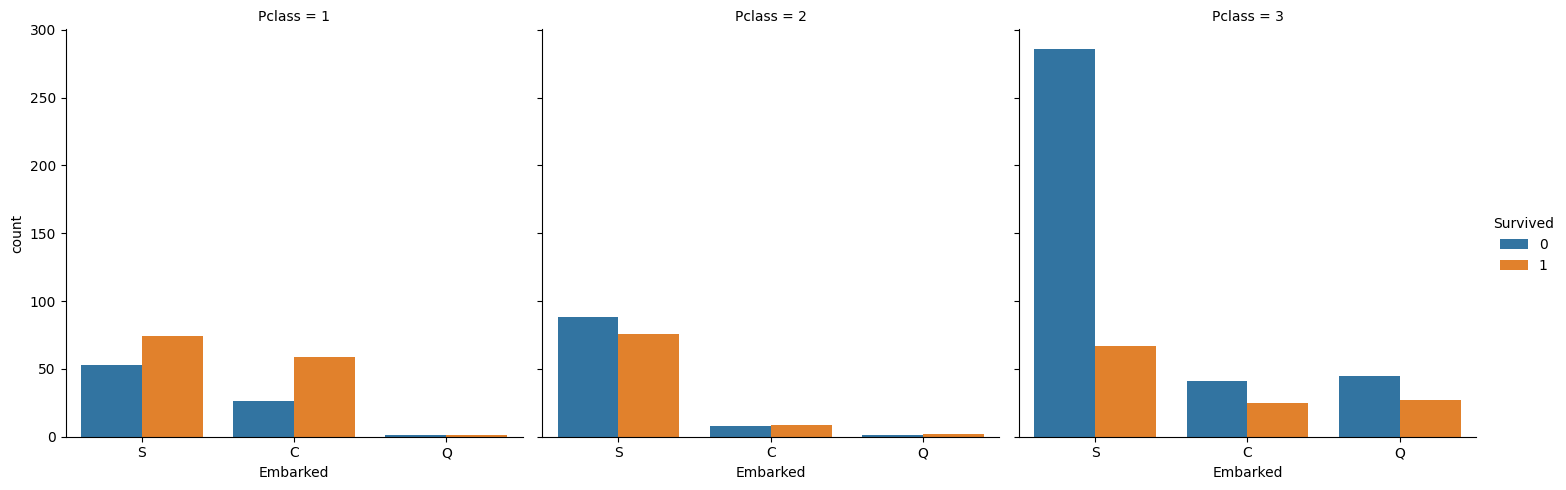


Nhận xét: Tỉ lệ sống sót khác nhau giữa các cảng lên tàu và Pclass.


In [16]:
# Trực quan số lượng người thiệt mạng và sống sót theo Pclass và Embarked
sns.catplot(x='Embarked', col='Pclass', hue='Survived', data=df, kind='count')
plt.show()

print("\nNhận xét: Tỉ lệ sống sót khác nhau giữa các cảng lên tàu và Pclass.")